In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
titanic=sns.load_dataset("titanic")

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [8]:
numeric_data=titanic.select_dtypes(exclude=["object","bool","category"])
numeric_data.info()                                   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   age       714 non-null    float64
 3   sibsp     891 non-null    int64  
 4   parch     891 non-null    int64  
 5   fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 41.9 KB


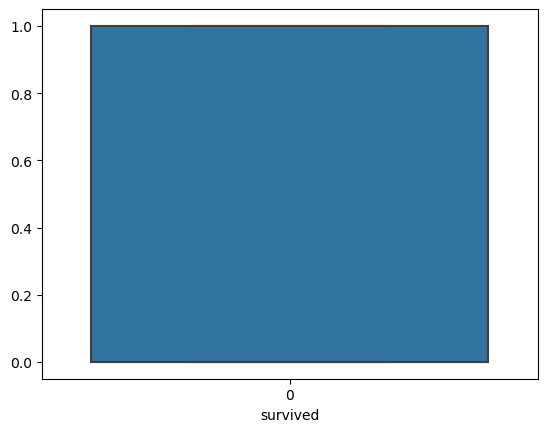

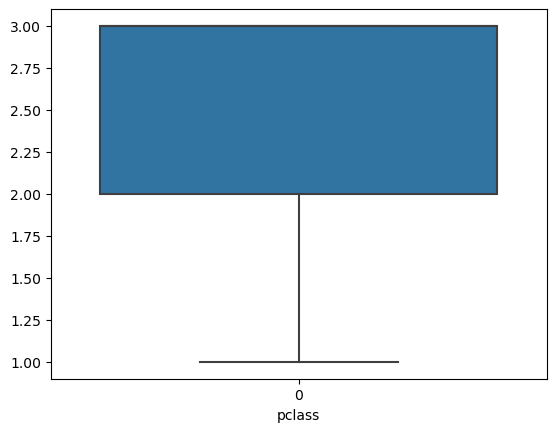

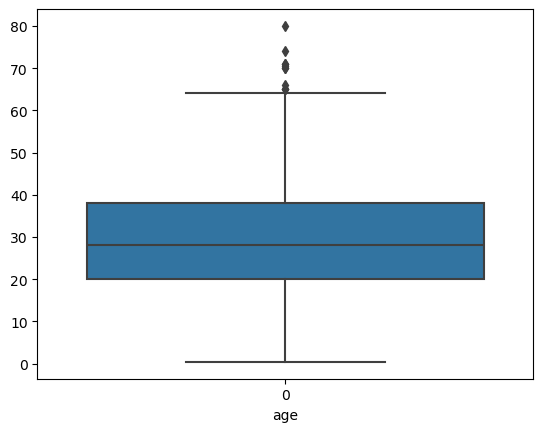

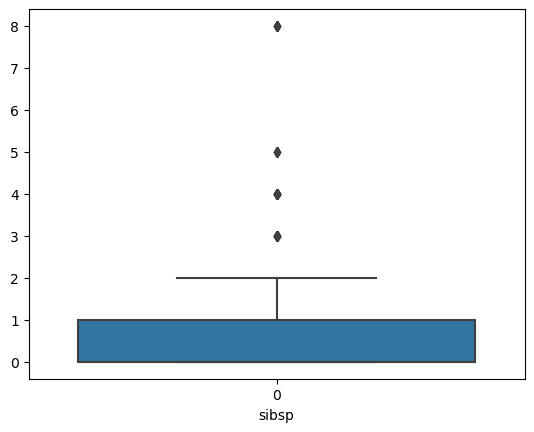

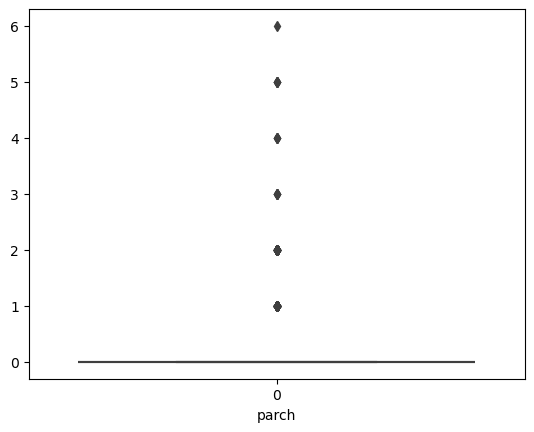

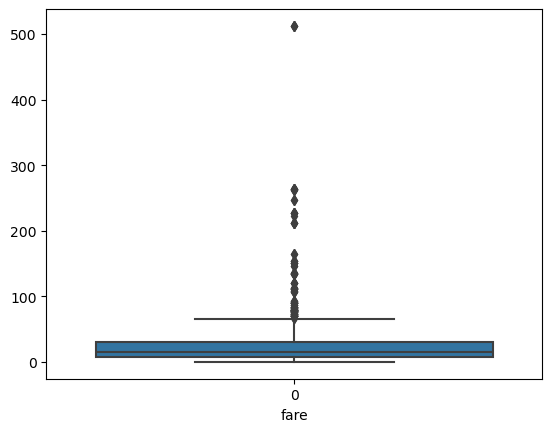

In [10]:
for i in numeric_data.columns:
    plt.figure()
    sns.boxplot(numeric_data[i])
    plt.xlabel(i)
    plt.show()

### It is visible that features such as fare,parch,sibsp,age has outliers

## Handling Outliers

### Identifying outlier using Z-Score

In [11]:
zscore_upper_limit = titanic["fare"].mean()+3*titanic["fare"].std()
zscore_lower_limit = titanic["fare"].mean()-3*titanic["fare"].std()

In [12]:
print(zscore_upper_limit)
print(zscore_lower_limit)

181.28449376011736
-116.87607782296807


In [15]:
titanic["fare"]=np.where(
    titanic["fare"] > zscore_upper_limit,
    zscore_upper_limit,
    np.where(titanic["fare"] < zscore_lower_limit,
             zscore_lower_limit,
             titanic["fare"]))

<Axes: >

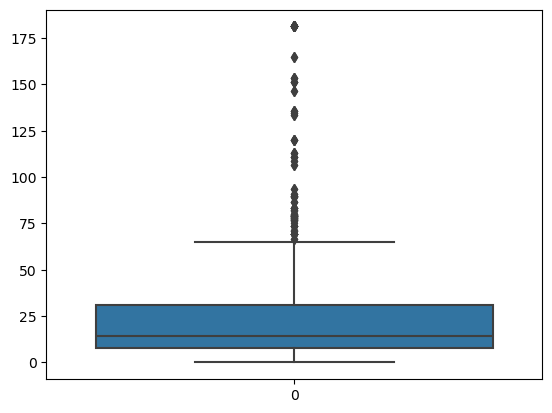

In [16]:
sns.boxplot(titanic["fare"])

In [19]:
upper_limit=titanic["fare"].quantile(0.75)
lower_limit=titanic["fare"].quantile(0.25)

In [22]:
titanic=titanic.dropna(axis=0)

In [28]:
titanic.duplicated().sum()

0

In [27]:
titanic=titanic.drop_duplicates()

In [30]:
percentile25=titanic["fare"].quantile(0.25)
percentile75=titanic["fare"].quantile(0.75)

In [31]:
iqr=percentile75 - percentile25

In [32]:
iqr_upper_limit = percentile75 + 1.5*iqr
iqr_lower_limit = percentile25 - 1.5*iqr

In [38]:
titanic["fare"] = np.log1p(titanic["fare"])

<Axes: xlabel='fare'>

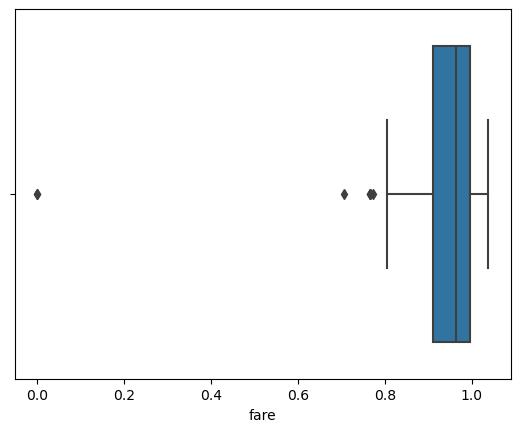

In [45]:
sns.boxplot(data=titanic,x="fare")

## We have reduced the number of outliers in fare now

In [46]:
titanic.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [47]:
titanic["parch"]=np.log1p(titanic["parch"])

<Axes: xlabel='parch'>

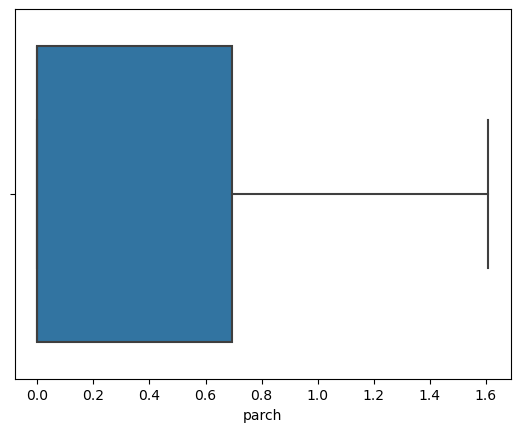

In [49]:
sns.boxplot(data=titanic,x="parch")

In [50]:
titanic[["sibsp","age"]]=np.log1p(titanic[["sibsp","age"]])

<Axes: xlabel='age'>

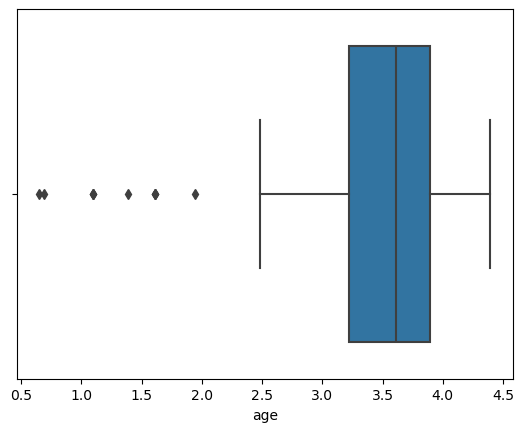

In [52]:
sns.boxplot(data=titanic,x="age")

<Axes: xlabel='sibsp'>

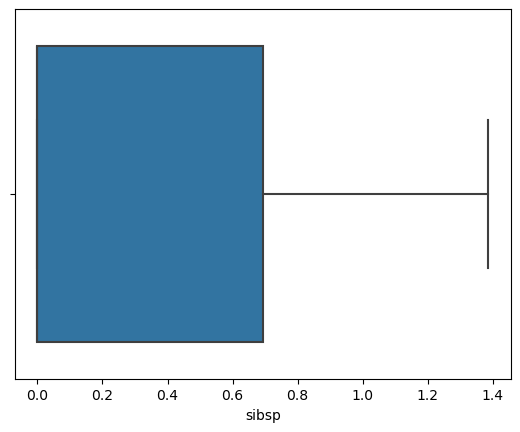

In [53]:
sns.boxplot(data=titanic,x="sibsp")

In [54]:
age_up=titanic["age"].quantile(0.9)
age_low=titanic["age"].quantile(0.1)

In [56]:
filter = (titanic["age"] <= age_up) & (titanic["age"] >= age_low)

In [58]:
titanic=titanic[filter]

<Axes: xlabel='age'>

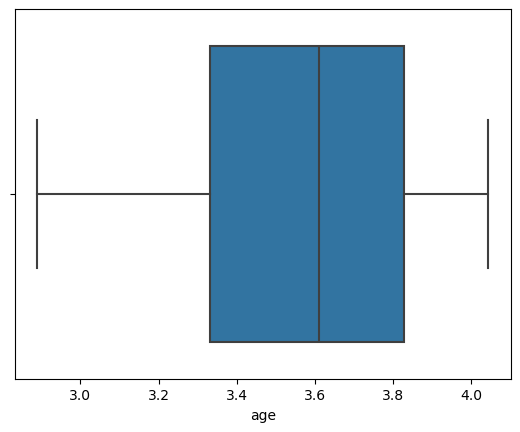

In [59]:
sns.boxplot(data=titanic,x="age")